# Study - Station Keeping
This code intends to study the station keeping capabilities of a 3U Cubesat through orbital mechanics.  
The variables of interest are:
<ul>
    <li><b>Propellant Usage:</b> the approximate amount of propellant used for performing orbital correction maneuver after perturbations have modified it.</li>
    <li><b>Energy:</b> the approximate amount of power and energy used by the thruster in order to perform the maneuver.</li>
    <li><b>Time:</b> the amount of time needed in order to perform the orbital correction maneuver.</li>
</ul>

In [1]:
from maneuvers import Maneuvers
import auxiliary, constants, models
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [22]:
# INITIAL CONDITIONS
coe,date = auxiliary.parseTle("suchai0.tle")
T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5

# SPACECRAFT DEFINITIONS
cubesat = models.Cubesat("3U")
cubesat.thruster = models.Thruster(thrust=10e-3, isp=7200)

# MANEUVERING
maneuvers = Maneuvers(coe,cubesat,date)
# Single pass with no perturbations
maneuvers.propagate(T,60)
# A Month of perturbations
maneuvers.addPerturbation("J2")
maneuvers.addPerturbation("atmosphere")
maneuvers.addPerturbation("moon_gravity")
maneuvers.addPerturbation("sun_gravity")
maneuvers.addPerturbation("solar_pressure")
maneuvers.propagate(60*60*24*30,60)
# Orbital Correction
#maneuvers.removePerturbation("J2")
#maneuvers.removePerturbation("atmosphere")
#maneuvers.removePerturbation("moon_gravity")
#maneuvers.removePerturbation("sun_gravity")
#maneuvers.removePerturbation("solar_pressure")
maneuvers.addPerturbation("thrust")
targetCoe = [coe[0],coe[1],None,None,coe[4]]
print(targetCoe)
maneuvers.setTargetRun(targetCoe,use_secular_coe=False)
maneuvers.propagate(60*60*24*2.2,60)
maneuvers.removePerturbation("thrust")
# Single pass with no perturbations

maneuvers.propagate(T*10,60)

Propagating...from day  0.0  to  0.06576335810286972
Propagating...from day  0.06576335810286972  to  30.06576335810287
[6879844.551132894, 0.0010537, None, None, 4.109573200696873]
Propagating...from day  30.06576335810287  to  32.26576335810287
Propagating...from day  32.26576335810287  to  32.92339693913157


------------MANEUVER REPORT-------------
----INITIAL CONDITIONS----
Spacecraft:
  Wet Mass: 		3 kg
  Dry Mass: 		2.0 kg
  Propellant Mass: 	1.0 kg
  Area: 		0.023333333333333334 m2
  Cd: 			2.2
Orbit:
  Semi-major axis (a): 		6879.844551132894 km
  Eccentricity (e): 		0.001054
  Inclination (i): 		97.4489 deg
  Argument of Perigee (omega): 	248.5815 deg
  RAAN (Omega): 		235.4612 deg
  True Anomaly (nu): 		110.95639 deg

----STAGE 1----
Spacecraft:
  Propellant Mass: 	1.0 kg
Orbit:
  Semi-major axis (a): 		6879.844551132894 km
  Eccentricity (e): 		0.001054
  Inclination (i): 		97.4489 deg
  Argument of Perigee (omega): 	248.5815 deg
  RAAN (Omega): 		235.4612 deg
  True Anomaly (nu): 		110.95638 deg

----STAGE 2----
Spacecraft:
  Propellant Mass: 	1.0 kg
Orbit:
  Semi-major axis (a): 		6873.286765598106 km
  Eccentricity (e): 		0.000889
  Inclination (i): 		97.44956042272673 deg
  Argument of Perigee (omega): 	114.25628 deg
  RAAN (Omega): 		265.31984 deg
  True Anomaly (nu): 		97.587

<IPython.core.display.Javascript object>


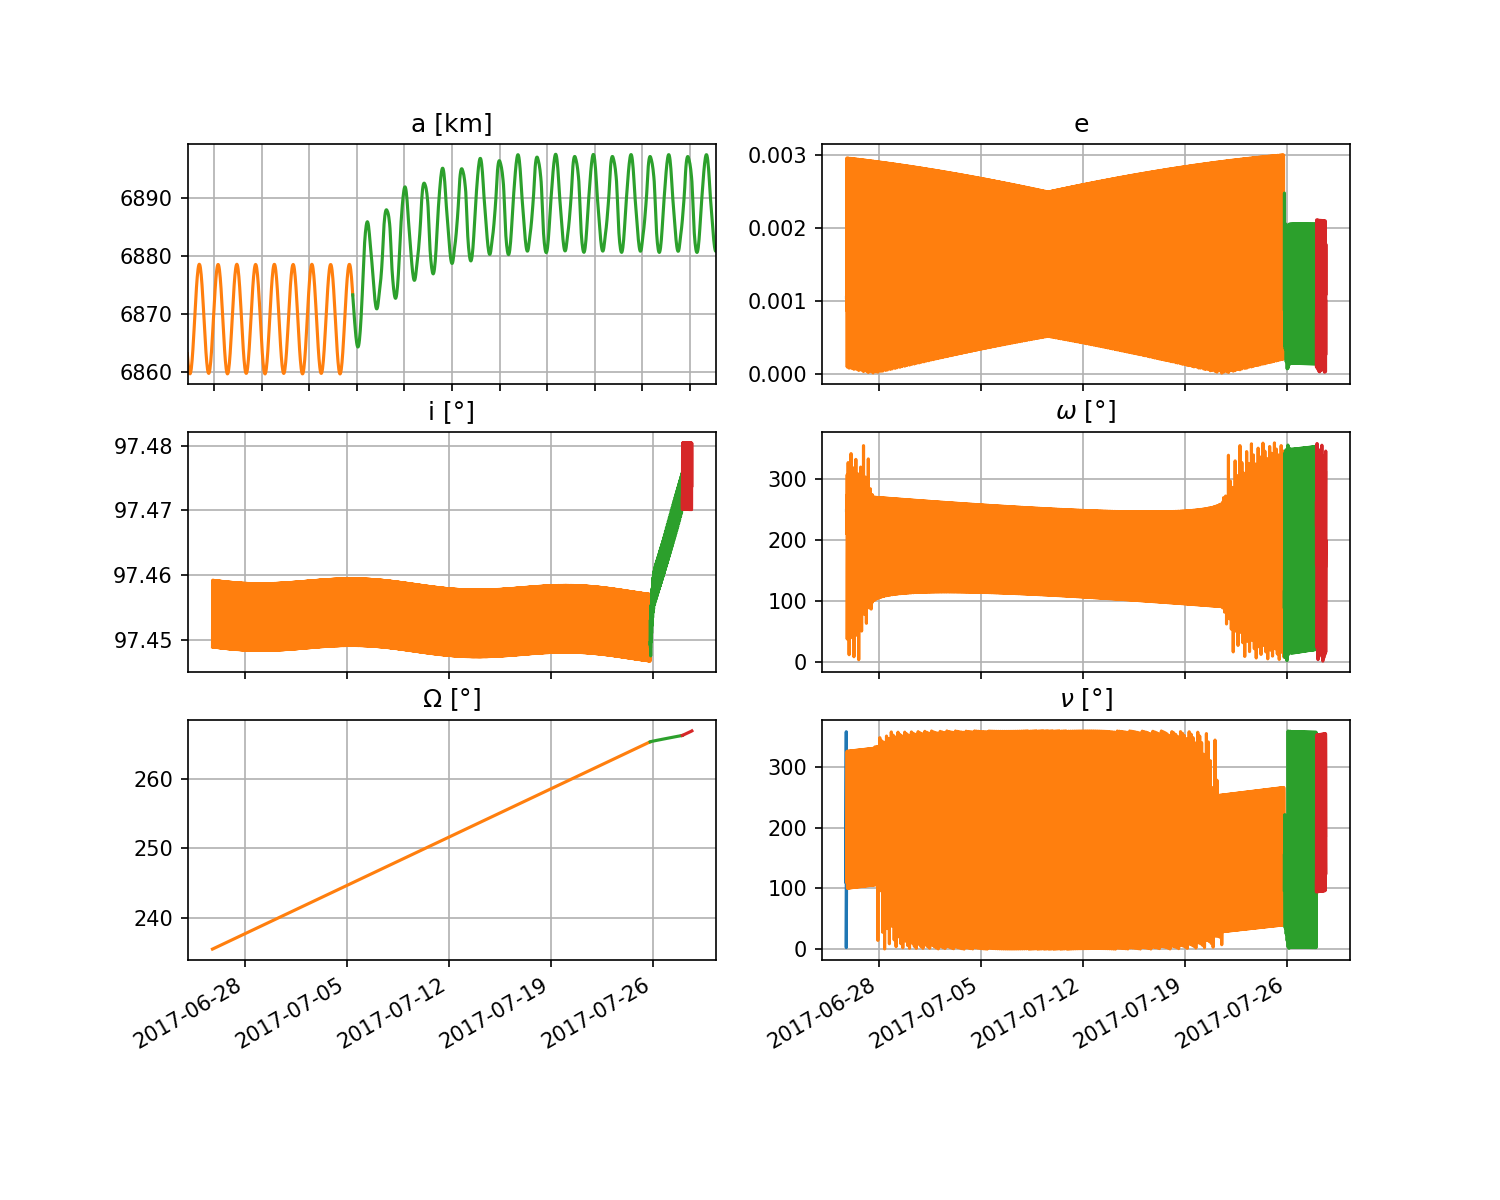

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

In [23]:
maneuvers.makeReport()
%matplotlib notebook
maneuvers.plot("coe")
display(maneuvers.ipvPlot3D());

<IPython.core.display.Javascript object>


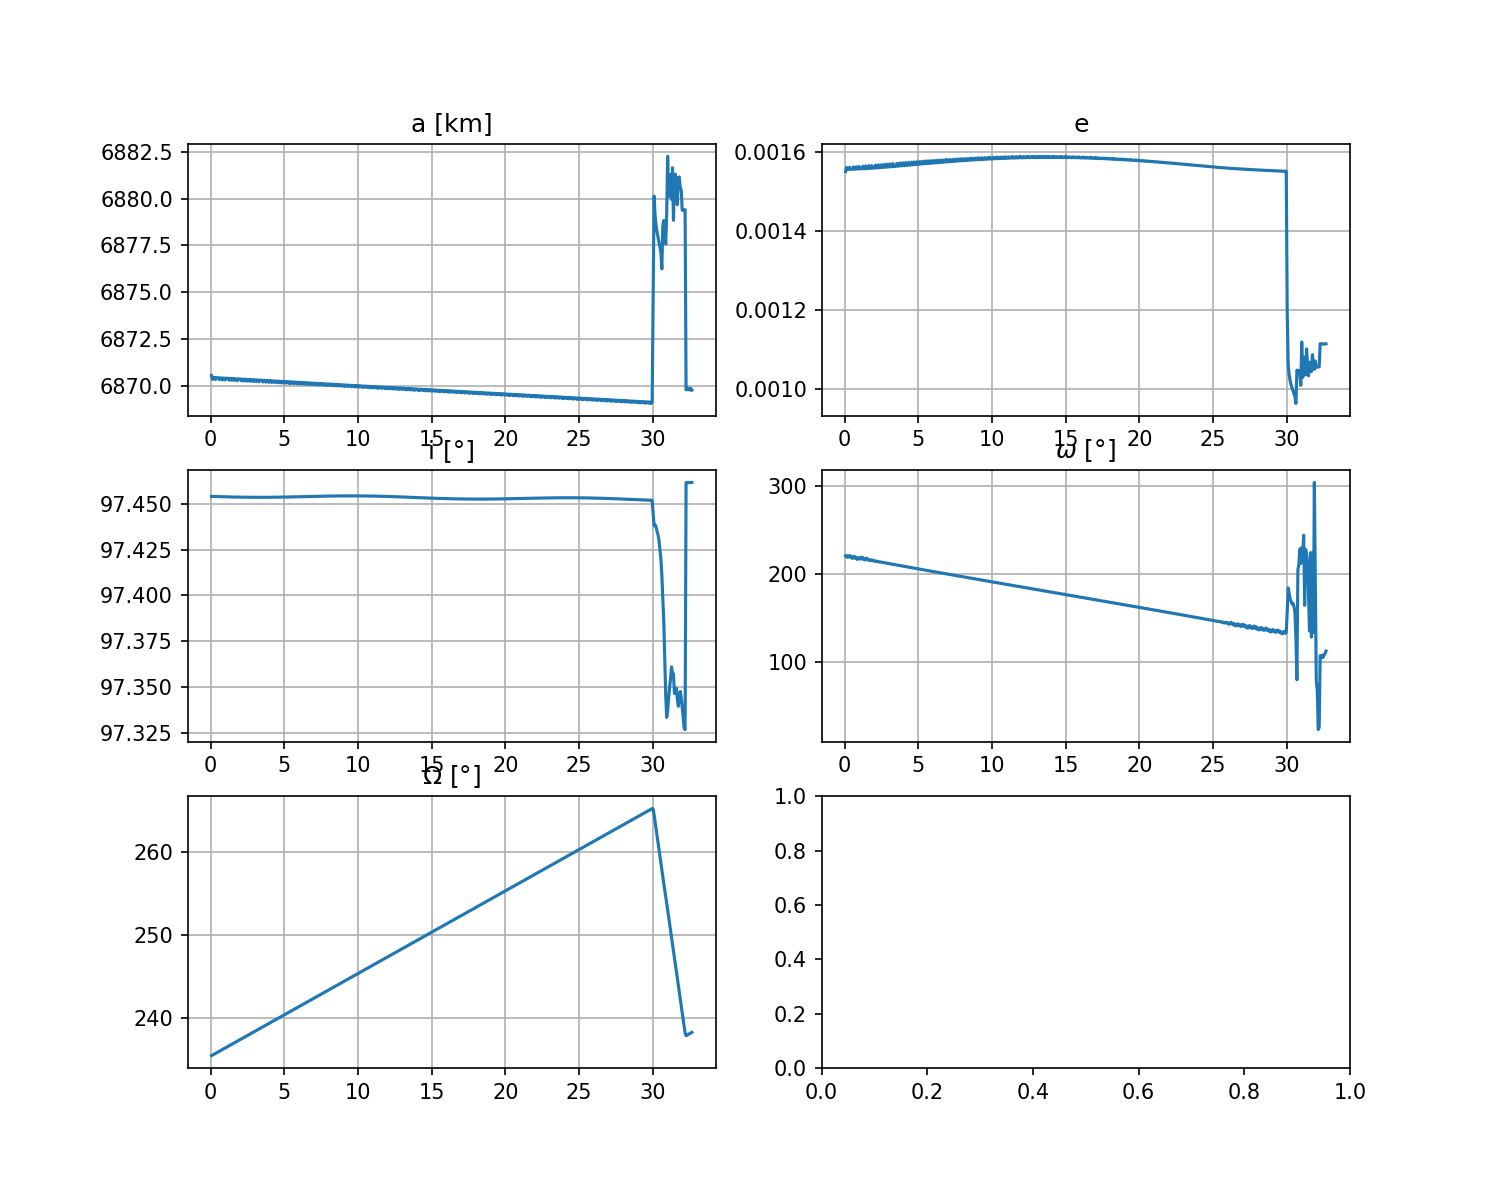

In [21]:
secularCoe, t = maneuvers.calculateSecularElements();
secularCoe = secularCoe[1:-2]
t = t[1:-2]
# PLOTTING CLASSICAL ORBITAL ELEMENTS
titles = ["a","e","i","$\omega$","$\Omega$","$\\nu$"]
ylabels = ["[km]", "", "[°]", "[°]", "[°]", "[°]"]
fig, axes = plt.subplots(3,2,figsize=(10,8))
for i in range(0,5):
    if i in [2,3,4]:
        axes[int((i-i%2)/2),i%2].plot(t/60/60/24,secularCoe[:,i]*180/np.pi)
    else:
        if i == 0:
            axes[int((i-i%2)/2),i%2].plot(t/60/60/24,secularCoe[:,i]/1000)
        else:
            axes[int((i-i%2)/2),i%2].plot(t/60/60/24,secularCoe[:,i])
    axes[int((i-i%2)/2),i%2].set_title(titles[i]+" "+ylabels[i])
    axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_scientific(False)
    axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_useOffset(False)
    axes[int((i-i%2)/2),i%2].grid(b=True)
